In [12]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from math import log2

In [3]:
def graph_comp(df: DataFrame, I: int):
    # Group by the column and calculate the mean

    df = df[df['I'] == I]
    df.loc[:, 'J'] = df.loc[:,'J'].apply(lambda x: 2**x)
    fib_heap = df[df['Type'] == 'FibHeap'].drop(columns=['Type']).groupby('J').mean().reset_index()
    bin_heap = df[df['Type'] == 'BinHeap'].drop(columns=['Type']).groupby('J').mean().reset_index()

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(fib_heap['J'], fib_heap['Time'], marker='x', linestyle='-', color='blue')
    plt.plot(bin_heap['J'], bin_heap['Time'], marker='+', linestyle='-', color='red')

    # Set labels and title
    plt.xlabel('J')
    plt.ylabel('Time (seconds)')
    plt.title('Time vs J, I = ' + str(I))

    plt.xscale('log', base=2)
    plt.yscale('log', base=10)

    # Show the plot
    plt.show()

In [13]:
def graph_times(df: DataFrame, I: int, type: str):
    # Group by the column and calculate the mean

    # Quadratic Curve
    e = np.linspace(2**16, 2**22, 1000)
    v = I

    if type == 'FibHeap':
        y = v*log2(e)




    df = df[df['I'] == I]
    df.loc[:, 'J'] = df.loc[:,'J'].apply(lambda x: 2**x)
    df = df[df['Type'] == type].drop(columns=['Type']).groupby('J').mean().reset_index()

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(df['J'], df['Time'], marker='x', linestyle='-', color='blue')

    # Set labels and title
    plt.xlabel('J')
    plt.ylabel('Time (seconds)')
    plt.title('Time vs J, I = ' + str(I))

    plt.xscale('log', base=2)
    plt.yscale('log', base=10)

    # Show the plot
    plt.show()

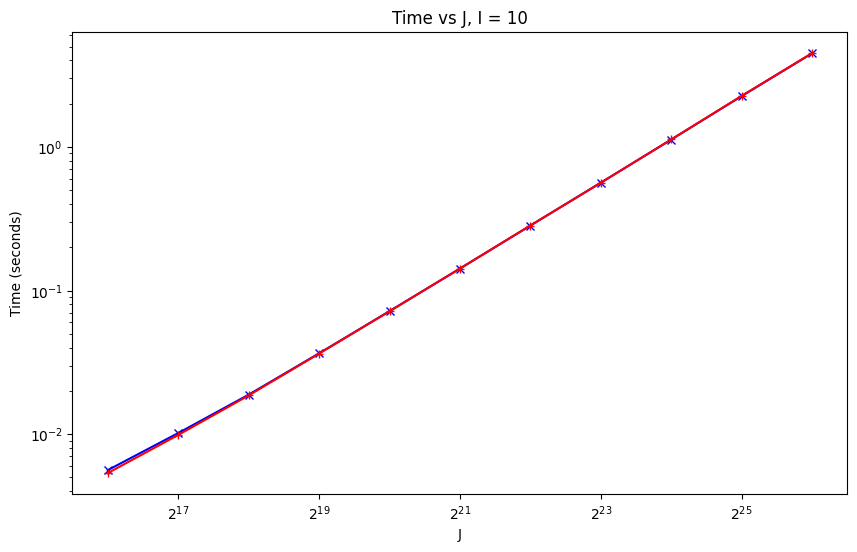

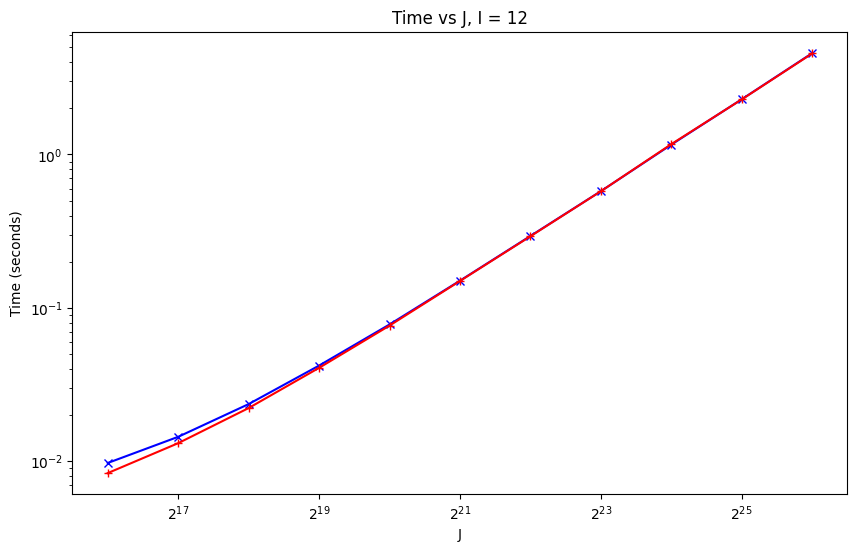

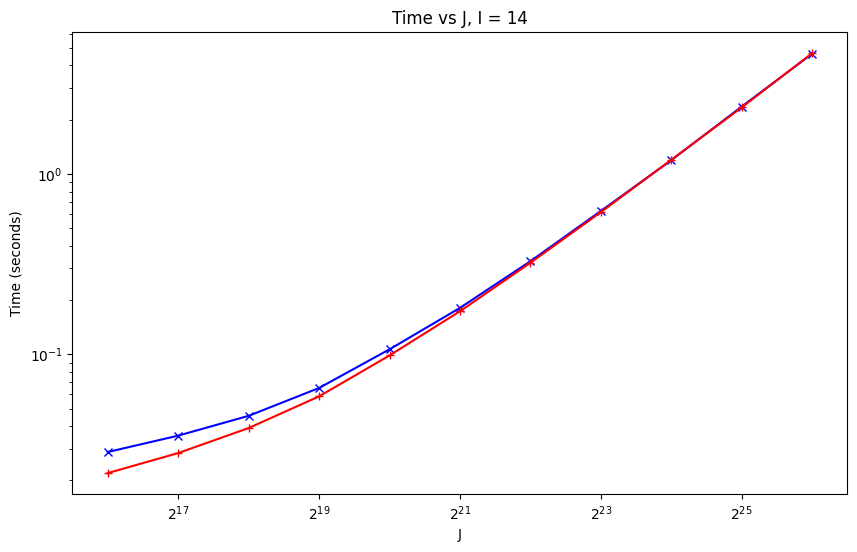

In [6]:
df : pd.DataFrame = pd.read_csv("results.csv")

creation_times = df[df['Type'] == 'Graph'].drop(columns=['Type'])
bin_heap_times = df[df['Type'] == 'BinHeap'].drop(columns=['Type'])
fib_heap_times = df[df['Type'] == 'FibHeap'].drop(columns=['Type'])

df_cmp = df[df['Type'] != 'Graph']
graph_comp(df_cmp, 10)
graph_comp(df_cmp, 12)
graph_comp(df_cmp, 14)

Pendiente: 6.704438691955194e-08
Intersección: 0.0015735737853627418


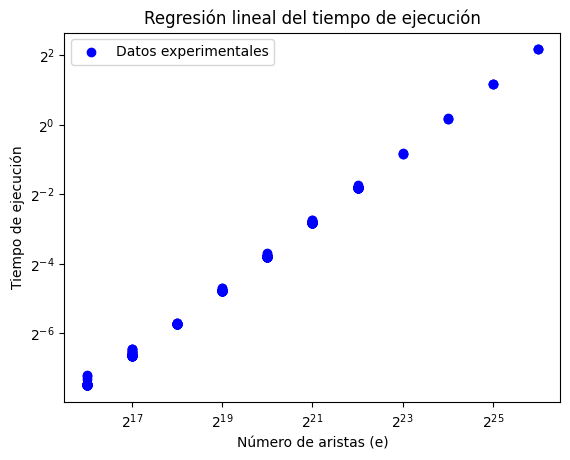

In [16]:
# Cargar los datos desde un archivo CSV
# Supongamos que tu archivo CSV tiene dos columnas: 'edges' y 'time'
df = pd.read_csv('results.csv')

df = df[df['Type'] == 'FibHeap'].drop(columns=['Type'])
df = df[df['I'] == 10].drop(columns=['I'])
df.loc[:, 'J'] = df.loc[:,'J'].apply(lambda x: 2**x)
df = df.groupby('J').mean().reset_index()
#df.loc[:, 'I'] = df.loc[:,'I'].apply(lambda x: 2**x)

# Preparar los datos para la regresión lineal
X = df['J'].values.reshape(-1, 1)  # Valores de e (número de aristas)
y = df['Time'].values  # Tiempos de ejecución

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

# Obtener los coeficientes de la regresión
pendiente = model.coef_[0]
intersección = model.intercept_

# Imprimir los resultados de la regresión
print(f"Pendiente: {pendiente}")
print(f"Intersección: {intersección}")

# Realizar predicciones (opcional, para graficar la recta ajustada)
#y_pred = model.predict(X)

# Graficar los resultados
plt.scatter(X, y, color='blue', label='Datos experimentales')
#plt.plot(X, y_pred, color='red', label='Recta ajustada')
plt.xlabel('Número de aristas (e)')
plt.ylabel('Tiempo de ejecución')
plt.title('Regresión lineal del tiempo de ejecución')
plt.legend()
plt.xscale('log', base=2)
plt.yscale('log', base=2)

plt.show()
